Importing libraries

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import os, datetime

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [64]:
data = pd.read_csv('winequality-red.csv')

data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1443,6.9,0.58,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.7,5
701,7.0,0.65,0.02,2.10,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
764,9.1,0.68,0.11,2.80,0.093,11.0,44.0,0.99888,3.31,0.55,9.5,6
895,7.1,0.59,0.01,2.30,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
1245,7.4,0.55,0.19,1.80,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5


In [65]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [66]:
data.shape

(1599, 12)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [68]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

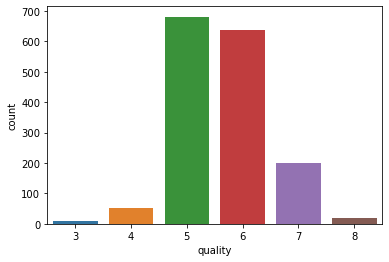

In [69]:
sns.countplot(data['quality'])

No Null features

Data Visualization

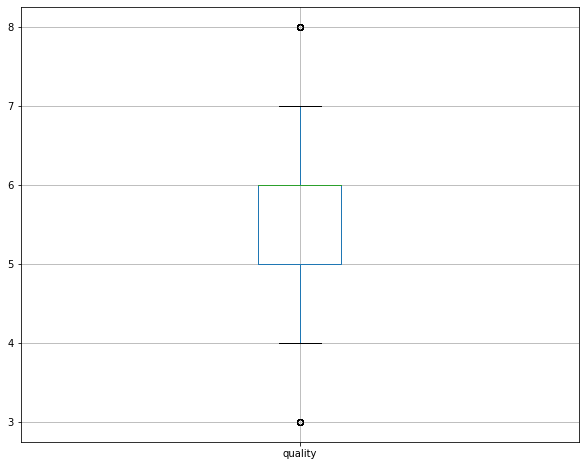

In [70]:
plt.figure(figsize=(10, 8))
data.boxplot('quality')
plt.show()

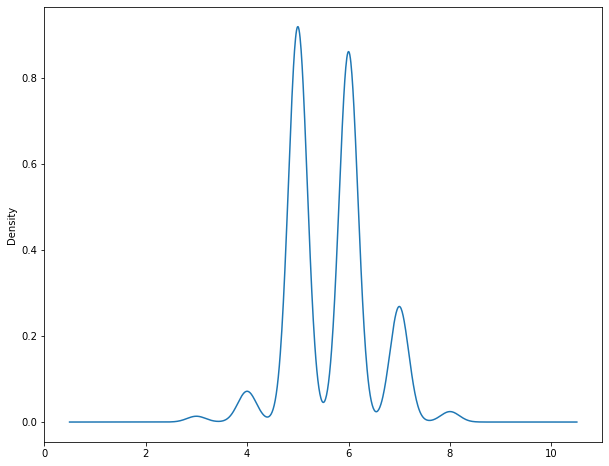

In [71]:
plt.figure(figsize=(10, 8))
data['quality'].plot.kde()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

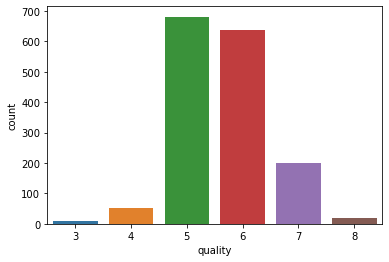

In [72]:
sns.countplot(x ='quality', data = data)

In [73]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

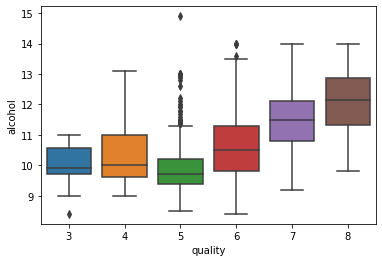

In [74]:
sns.boxplot(x="quality",y="alcohol", data=data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

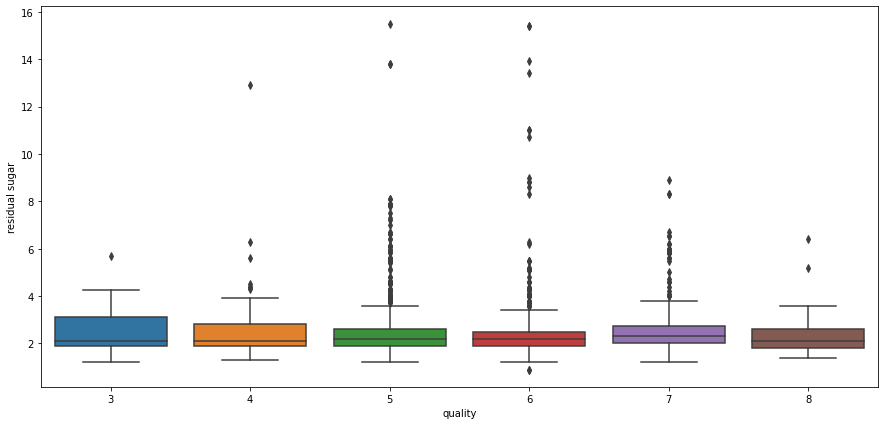

In [75]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="residual sugar", data=data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

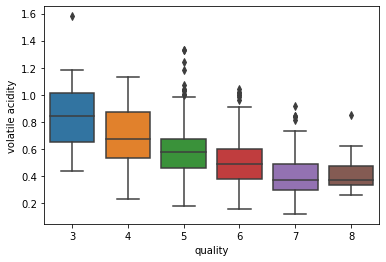

In [76]:
sns.boxplot(x="quality",y="volatile acidity", data=data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

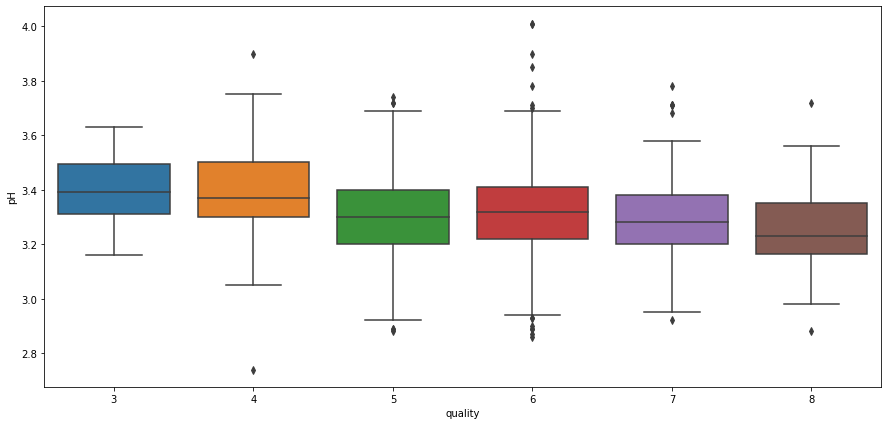

In [77]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="pH", data=data)

In [78]:
data['Quality']=0
data.loc[data['quality']>6, 'Quality']=1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<AxesSubplot:xlabel='Quality', ylabel='count'>

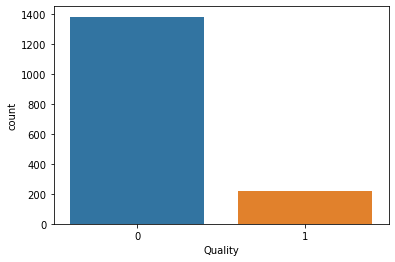

In [79]:
sns.countplot(data['Quality'])

In [80]:
data['Quality'].value_counts()
data.drop('quality', axis=1, inplace=True)

<AxesSubplot:xlabel='Quality', ylabel='fixed acidity'>

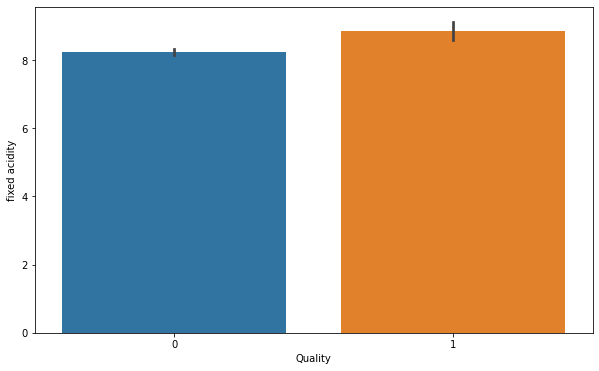

In [81]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'fixed acidity', data = data)

<AxesSubplot:xlabel='Quality', ylabel='volatile acidity'>

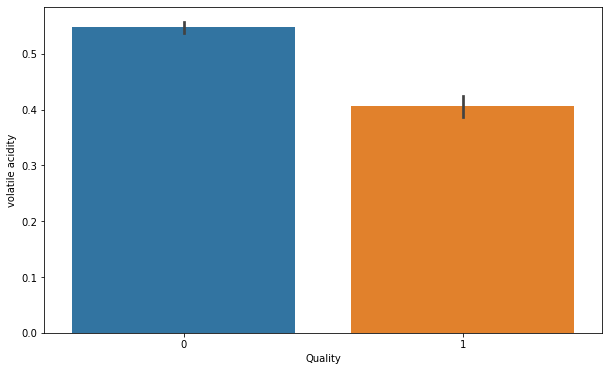

In [82]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'volatile acidity', data = data)

<AxesSubplot:xlabel='Quality', ylabel='chlorides'>

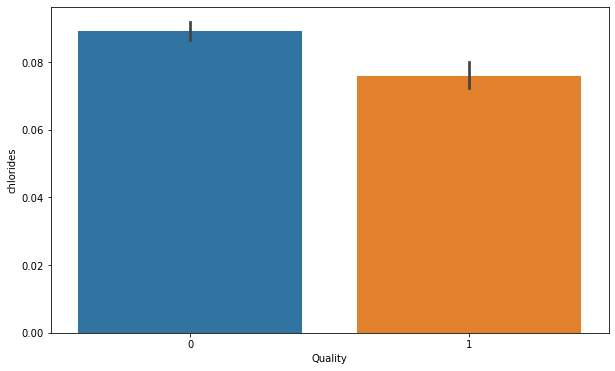

In [83]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='Quality', ylabel='pH'>

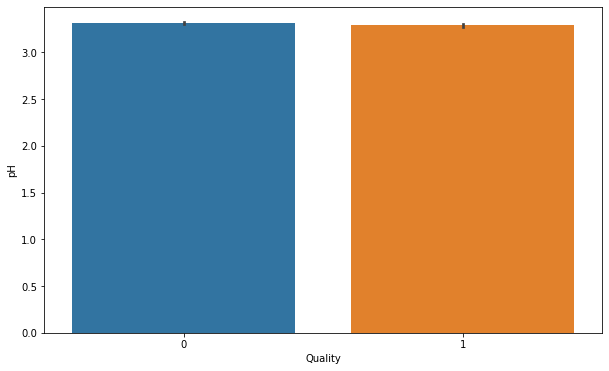

In [84]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'pH', data = data)

<AxesSubplot:xlabel='Quality', ylabel='alcohol'>

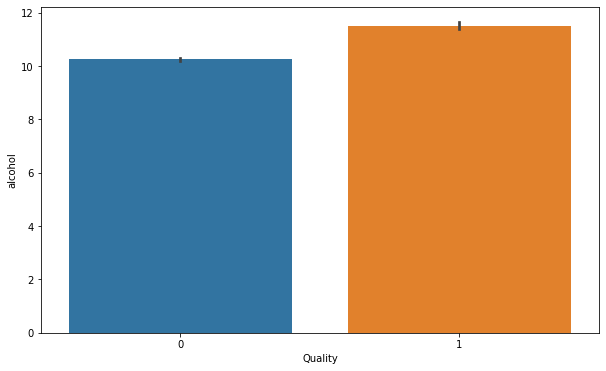

In [85]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'alcohol', data = data)

<AxesSubplot:xlabel='Quality', ylabel='sulphates'>

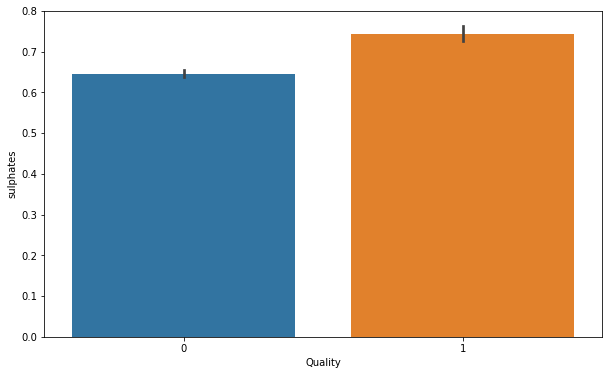

In [86]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='Quality', ylabel='residual sugar'>

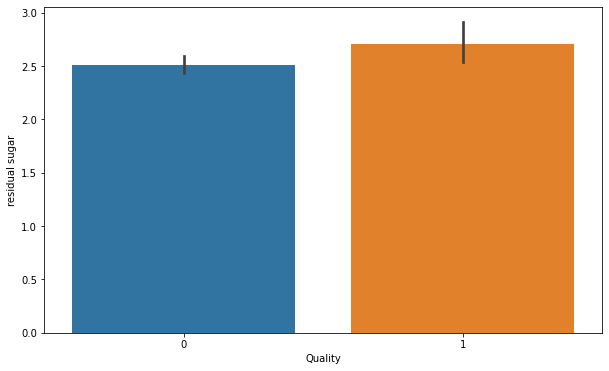

In [87]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='Quality', ylabel='citric acid'>

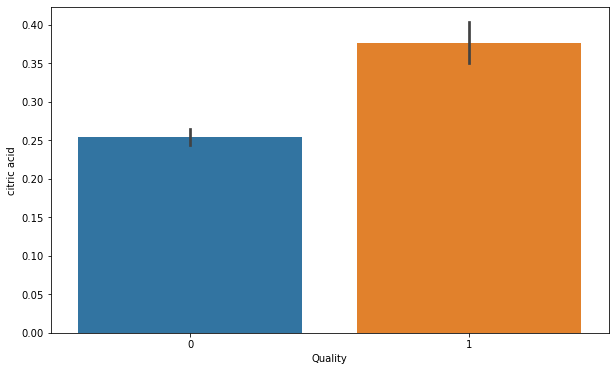

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'citric acid', data = data)

In [89]:
data_corr = data.corr()

data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


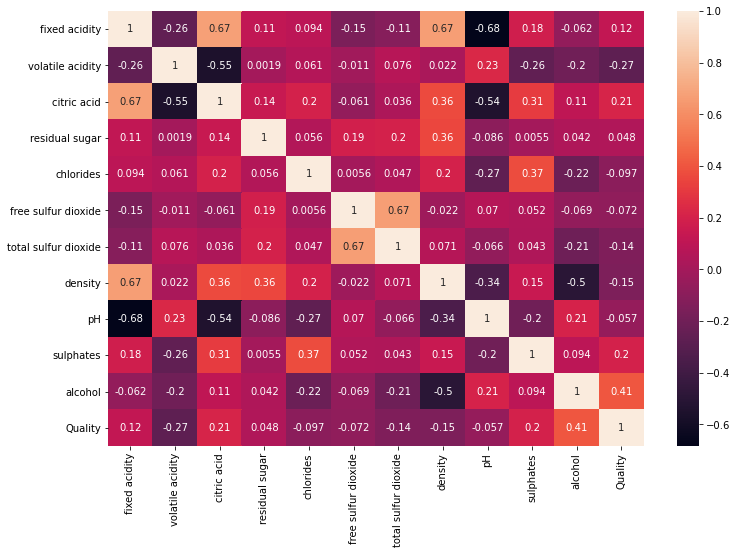

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

Splitting the data

In [91]:
features = data.drop('Quality', axis=1)

target = data[['Quality']]

In [92]:
features.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1175,6.5,0.610,0.00,2.20,0.095,48.0,59.0,0.99541,3.61,0.70,11.5
403,11.4,0.600,0.49,2.70,0.085,10.0,41.0,0.99940,3.15,0.63,10.5
83,7.3,0.670,0.26,1.80,0.401,16.0,51.0,0.99690,3.16,1.14,9.4
1181,9.8,0.390,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4
835,7.6,0.665,0.10,1.50,0.066,27.0,55.0,0.99655,3.39,0.51,9.3


In [93]:
target.sample(10)

,Quality
166,0
212,0
1200,0
712,0
428,0
719,0
1136,0
1137,0
1103,0
279,1


In [94]:
standardScaler = StandardScaler()

features = pd.DataFrame(standardScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)

features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


Splitting dataset into training and testing data

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [96]:
x_train.shape, y_train.shape

((1279, 11), (1279, 1))

In [97]:
x_test.shape, y_test.shape

((320, 11), (320, 1))

In [98]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [99]:
x_train.shape, x_val.shape, x_test.shape

((1087, 11), (192, 11), (320, 11))

In [100]:
y_train.shape, y_val.shape, y_test.shape

((1087, 1), (192, 1), (320, 1))

Building the model

In [140]:
def build_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(64, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(16, activation='relu')
    x = dense_layer2(x)
    
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer3 = layers.Dense(16, activation='relu')
    x = dense_layer3(x)
    
    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [141]:
model = build_model()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17  

In [142]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 11), (None, 1)), types: (tf.float64, tf.int64)>

In [143]:
num_epochs = 100

In [144]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [145]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17  

Plotting accuracy

In [146]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_7', 'recall_7', 'val_loss', 'val_accuracy', 'val_precision_7', 'val_recall_7'])

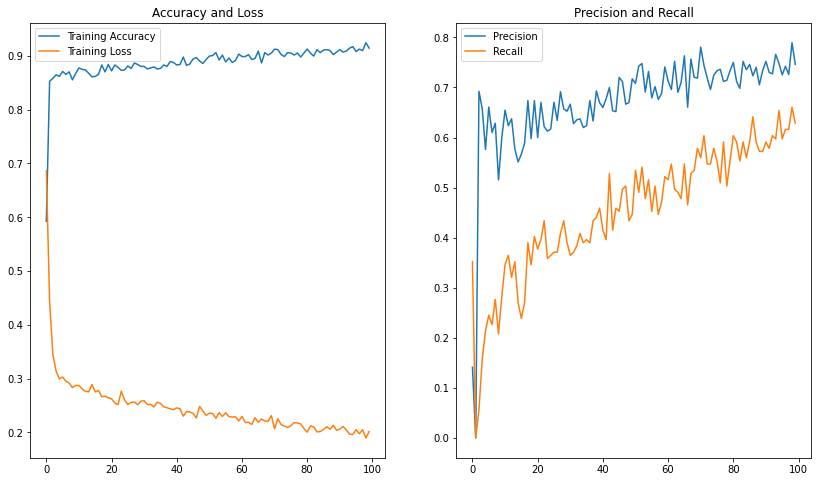

In [147]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_7']
recall = training_history.history['recall_7']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

Model evaluation

In [148]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

320/320 [==============================] - 0s 44us/sample - loss: 0.3955 - accuracy: 0.8969 - precision_7: 0.4828 - recall_7: 0.4375 


loss           0.395541
accuracy       0.896875
precision_7    0.482759
recall_7       0.437500
dtype: float64

Prediction

In [149]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[7.2160363e-04],
       [8.3148479e-06],
       [4.0868443e-01],
       [9.9215895e-02],
       [1.2582931e-01],
       [9.6311539e-02],
       [1.1015102e-01],
       [0.0000000e+00],
       [2.8223497e-01],
       [3.8465858e-04]], dtype=float32)

In [150]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [151]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [152]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [153]:
pred_results.sample(10)

,y_test,y_pred
120,0,0
128,1,0
271,0,0
27,0,0
319,0,0
227,1,0
28,0,0
164,0,0
299,0,0
306,0,0


In [154]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,273,18
1,15,14


In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [156]:
accuracy_score(y_test, y_pred)

0.896875

In [157]:
precision_score(y_test, y_pred)

0.4827586206896552

In [158]:
recall_score(y_test, y_pred)

0.4375